# Taller 3 Agrupación

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans


## Medidas de proximidad

### 1
Dados los ejemplos numéricos $A=\{1,0,2,5,3\}$ y $B=\{2,1,0,3,-1\}$, encontrar:

a) La distancia euclideana

b) La distancia city-block

c) La distancia Minkowski para p=3

d) La correlación coseno

In [2]:
A=[1,0,2,5,3]
B=[2,1,0,3,-1]

In [3]:
euclidean_distances(A, B)

array([[ 5.09901951]])

In [4]:
manhattan_distances(A,B)

array([[ 10.]])

In [5]:
distance.minkowski(A,B,3)

4.3444814857686112

In [6]:
distance.cosine(A,B)

0.42117123858369387

### 2
Dado los ejemplos catégoricos $C=\{A,B,A,B,A,A\}$ y $D=\{B,B,A,B,B,A\}$, encontrar:

a) La similaridad usando SMC (Simple matching coeficient)

b) La similaridad usando Jaccard

c) La similaridad usando el Coeficiente de Rao

In [7]:
C=["A","B","A","B","A","A"]
D=["B","B","A","B","B","A"]


In [8]:
def sim_smc(x, y):
    matches = 0
    for idx, val in enumerate(x):
        if x[idx] == y[idx]:
            matches += 1
    return matches / float(len(x))

df_cd=pd.DataFrame({"C":C, "D":D})
tabl_CD=pd.crosstab(df_cd["C"],df_cd["D"])
a=float(tabl_CD["A"][0])
b=float(tabl_CD["B"][0])
c=float(tabl_CD["A"][1])
d=float(tabl_CD["B"][1])


sim_smc(C,D)

0.6666666666666666

In [9]:
#jaccard
a/(a+b+c)

0.5

In [10]:
#RAO
a/(a+b+c+d)

0.3333333333333333

## Algoritmos
### 1
Aplicar el algoritmo k-means al conjunto de datos Iris (sin la clase), para $k=2,3,4,5,6,7,8$. Dibujar
la gáfica de Elbow(codo) basada en el SSE. Explique los resultados.

In [11]:
iris = datasets.load_iris().data
kmeans = KMeans(n_clusters=2, random_state=0).fit(iris)

In [12]:
def sse(dataset,n_clust):
    kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(dataset)
    err=[]
    for i in range(len(dataset)):
        vector=dataset[i]
        cluster=kmeans.labels_[i]
        centroid=kmeans.cluster_centers_[cluster]
        err.append(distance.sqeuclidean(vector,centroid))
    return sum(err)

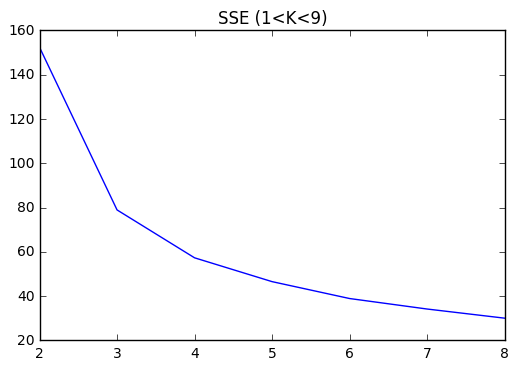

In [13]:
est_errs=[sse(iris,k) for k in range(2,9)]
plt.plot(range(2,9),est_errs)
plt.title('SSE (1<K<9)')

### 2
Dados K grupos de igual tamaño en un conjunto de datos, la probabilidad the escoger aleatoriamente un centroide inicial de un grupo es dada por 1=K , pero la probabilidad de que cada grupo tenga exactamente un centroide inicial es mucho más baja (es claro, que para el K-means tener un centroide inicial de cada grupo es una excelente inicialización del algoritmo). En general, si se tienen K grupos y cada grupo tiene n puntos, la probabilidad p de seleccionar un punto por cada grupo en un muestreo de tamaño K es:
$$\frac{K!}{K^{K}}$$

a) Dibujar la probabilidad de obtener un punto por cada grupo en una muestra de tamaño $K$
para valores de $2 < K < 100$.

b) Para K grupos, $K = 10; 100; 1000$, encontrar la probabilidad de que una muestra de de tamaño
$2K$ contenga al menos un punto de cada grupo. Puede usar métdos matemáticos o simulaciones
estadísticas para la respuesta.

In [14]:
def probab_centroid (n_clusters):
    return math.factorial(n_clusters)/float((n_clusters**n_clusters))

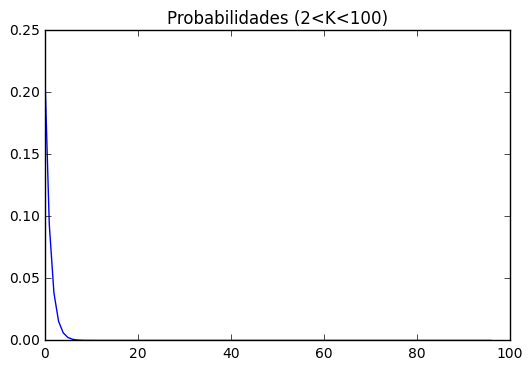

In [15]:
probs=[probab_centroid(n) for n in range(3,100)]
plt.plot(probs)
plt.title('Probabilidades (2<K<100)')

### 3
Los algoritmos jerárquicos aglomerativos tradicionales para agrupación unen dos clusters en cada
iteración. ¿Cree usted que estos algoritmos capturan adecuadamente la estructura de grupos de
un conjunto de datos? Si no, explique como podría pos-procesar los datos para obtener una mejor
apreciación de la estructura de los grupos.

#### Rta:

Los algoritmos aglomerativos presentan dificultades ante el ruido, la forma y el tamaño del cluster, dependiendo del tipo de enlace con el que se determine el cluster a unir en la siguiente iteración. Por lo tanto no capturan de manera adecuada la forma de los grupos, ya que no hay una única manera de superar estos inconvenientes. El pos-procesamiento implicaria revisar diferentes puntos de corte para los cluster y probar diferentes algoritmos para identificarlos parámetros que mejor describan loos datos.

### 4
Algoritmos jerárquicos son usados para generar $K$ grupos $(K >1)$ tomando los grupos al nivel
$K^{th}$ del dendograma. Analizando los grupos generados de esta forma, se puede evaluar el comportamiento
del algoritmo en diferentes tipos de datos y grupos, e incluso comparar con los resultados
generados por el algoritmo K-means.
Si se tiene el siguiente conjunto de puntos en una dimensión: $\{6,12,18,24,30,42,48\}$

a) Por cada uno de los siguientes conjuntos de centroides iniciales, crear dos (2) grupos asumiendo
cada punto al centroide más cercano, y luego calcular el error cuadrado total por cada conjunto
de dos grupos. Mostrar los grupos y el error cuadrado total por cada conjunto de centroides:

1) $\{18, 45\}$

2) $\{15, 40\}$

b) Ambas soluciones representan soluciones estables. Si el K-means se ejecutara tomando como
centroides iniciales los centroides dados, ¿Habría algún cambio en los grupos generados?

c) ¿Cuales serían los grupos producidos usando single link?

d) ¿Cuál algoritmo, K-means o Single link, parece producir la solución “más natural”?

e) ¿Cuál definición de agrupación corresponde mejor a la solución generada? (grupos bien separados,
basados en centro, densos, cercanso, etc.). ¿Cuál característica del algoritmo k-means
explica ese comportamiento?

### 5
Dado un conjunto de ejemplos categóricos de 5 dimensiones:

a) Aplique agrupamiento jerárquico aglomerativo, usando:

1) Medida intercluster enlace simple (single link o MIN) basado en el coeficiente de Rao.
Diagramar el dendograma

2) Medida intercluster enlace completo (complete link o MAX) basado en coeficiente de
correspondencia simple CCS (su sigla en inglés, SMC Simple Matching Coeficient). Diagramar
el dendograma

b) ¿Es posible usar una medida intercluster basada en prototipos? Si es posible, ¿cuál sería?

c) ¿Es posible usar el método de Ward? Explique.

In [16]:
dimens=["X1","X2","X3","X4", "X5"]
A=[1,0,1,1,0]
B=[1,1,0,1,0]
C=[0,0,1,1,0]
D=[0,1,0,1,0]
E=[1,0,1,0,1]
F=[0,1,1,0,0]

## Validación

### 1. 
Calcular pureza y entropía (medidas externas) de la siguiente matriz de confusión,

In [17]:
clases=["c1","c2","c3","c4","c5","c6","total"]
g1=[ 1, 1, 0, 11, 4, 676, 693]
g2= [27 ,89 ,333 ,827 ,253 ,33 ,1562]
g3= [326 ,465 ,8 ,105 ,16 ,29 ,949]
total= [354 ,555 ,341 ,943 ,273 ,738 ,3204]

### 2. 
Validar los resultados para k=3 usando medidas externas: matrix de confusión, precisión, recall,
F1, pureza y entropía del punto 4 (conjunto de datos Iris).

### 3.
Dadas las etiquetas de los clusters y la matriz de similaridad,

Etiqueta del cluster
P1 1
P2 1
P3 2
P4 2
S=
P1 P2 P3 P4
P1 1 0.8 0.65 0.55
P2 0.8 1 0.7 0.6
P3 0.65 0.7 1 0.9
P4 0.55 0.6 0.9 0
Computar la correlacion entre la matriz de similaridad y la matriz de similaridad ideal (1 si los
dos pertenecen al mismo cluster y 0 si no)

Artículos/Presentaciones
1. ¿Qué tienen en común los algoritmos Chameleon y Gravitational Clustering? Explicar.
2. ¿Cuales son las características del algoritmo Gravitational que lo hacen diferente a los algoritmos
tradicionales de clustering?
3. ¿Cuál es la relación entre los algoritmos K-means y EM